This notebook shows a simple example of using Hamilton as part of an LLM app.

In [2]:
# load some extensions / magic...
%load_ext hamilton_magic
%reload_ext hamilton_magic
# load extension
%load_ext autoreload
# configure autoreload to only affect specified files
%autoreload 1

The hamilton_magic extension is already loaded. To reload it, use:
  %reload_ext hamilton_magic
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# import the base libraries
from hamilton import driver

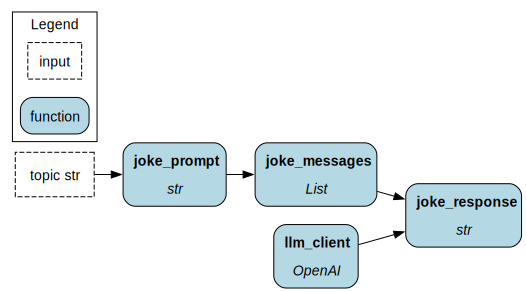

In [4]:
%%with_functions -m joke
# %%write_file joke.py
from typing import List

import openai


def llm_client() -> openai.OpenAI:
    return openai.OpenAI()


def joke_prompt(topic: str) -> str:
    return f"Tell me a short joke about {topic}"


def joke_messages(joke_prompt: str) -> List[dict]:
    return [{"role": "user", "content": joke_prompt}]


def joke_response(llm_client: openai.OpenAI,
                  joke_messages: List[dict]) -> str:
    response = llm_client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=joke_messages,
    )
    return response.choices[0].message.content

In [5]:
dr = (
        driver.Builder()
        .with_modules(joke)
        .build()
    )
print(dr.execute(["joke_response"],
                 inputs={"topic": "ice cream"}))

{'joke_response': "Why don't ice creams ever get invited to parties?\n\nBecause they always melt away!"}


# Prompts as code?

```python
def joke_prompt(topic: str) -> str:
    return f"Tell me a short joke about {topic}"
```

vs 

```python
def joke_prompt(topic: str, db: db_client) -> str:
    return db.get("joke_prompt").format(topic)
```

What is the operational difference between them?

# My mental model
Prompt + LLM API == equivalent to a "Model" in the ML world.
i.e. prompts are just hyperparameters.